# AI/ML/DS Workforce Pay 

## --------------------------------------------------------

#### The dataset contains 8805 rows × 11 columns, The dataset has data related to *AI*, *ML*  jobs and salaries and a employments trends from 2020 to 2024, offering a clear view of job Salaries across 77 countries all over the world, It includes details on job titles, experience levels, remote work ratios, and salary distributions across various currencies and regions, Perfect for applying what we have learned in our course.
##### The Columns are: 
- **id**: Unique identifier for each entry
- **work_year**: Year of the work entry
- **experience_level**: Experience level of the employee, 
- EN: Entry-level / Junior
- MI: Mid-level / Intermediate
- SE: Senior-level / Expert
- EX: Executive-level / Director
- **employment_type:** The type of employement for the role:
- PT: Part-time
- FT: Full-time
- CT: Contract
- FL: Freelance
- **job_title:** The rule worked in during the year.
- **salary:** The total gross salary amount paid.
- **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd:** The salary in USD.
- **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio:** The overall amount of work done remotely, possible values are as follows:
- 0: No remote work (less than 20%)
- 50: Partially remote
- 100: Fully remote (more than 80%)
- **company_location:** The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size:** The average number of people that worked for the company during the year:
- S: less than 50 employees (small)
- M: 50 to 250 employees (medium)
- L: more than 250 employees (large)

##### ___________________________________________________________________________________________________________

### Group 2
##### leadrer: Rahaf Sulaiman Almalaq 4452902
##### Shumukh Eid Alotaibi 4451941
##### Layal Mohammed Alhazmi 4451247
##### Abeer Anwar Alansari 4454243
##### Wejdan Saleh  Aljohani 4451126

##### ___________________________________________________________________________________________________________

Import the needed libraries for loading data 

In [1]:
import pandas as pd
import re
import numpy as np 

Load and show data 

In [2]:
df = pd.read_csv('salaries 2.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,77500,CAD,59615,CA,100,CA,S
1,2024,SE,FT,AI Developer,252000,USD,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,USD,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,USD,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,USD,86700,US,100,US,M


In [3]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
18051,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
18052,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
18053,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
18054,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
18055,2021,SE,FT,Data Scientist,7000000,INR,94665,IN,50,IN,L


### the dataset has 18056 rows and 11 coulmns

making sure that the data has no missing values:

In [4]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Number of diffrent location in the data 

In [5]:
len(df['company_location'].unique().sum())

154

In [6]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [7]:
df['company_size'].unique()

array(['S', 'M', 'L'], dtype=object)

In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,18056.000000,1.805600e+04,18056.000000,18056.000000
mean,2023.292036,1.638751e+05,150856.152913,30.884471
std,0.715810,3.265629e+05,68728.941915,45.828340
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.040000e+05,103500.000000,0.000000
50%,2023.000000,1.430000e+05,142200.000000,0.000000
75%,2024.000000,1.900000e+05,188500.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


#### *************************************************************************************************************

## Preprocessing 

Reducing the rows to the jobs that are related to AI,ML,DS only

In [9]:
df['job_title'].unique()

array(['Analytics Engineer', 'AI Developer', 'Data Scientist',
       'Research Engineer', 'Research Scientist', 'Data Engineer',
       'Data Analyst', 'Applied Scientist', 'Machine Learning Engineer',
       'Data Architect', 'Business Intelligence Analyst',
       'Research Analyst', 'Data Analytics Manager',
       'Data Product Manager', 'Data Analytics Lead',
       'Business Intelligence Engineer', 'Data Manager',
       'Machine Learning Scientist', 'Prompt Engineer', 'Insight Analyst',
       'BI Analyst', 'AI Engineer', 'Business Intelligence Lead',
       'BI Developer', 'Data Operations Analyst',
       'Data Reporting Analyst', 'Business Intelligence Developer',
       'Data Product Owner', 'Data Specialist', 'Business Intelligence',
       'MLOps Engineer', 'Data Visualization Specialist', 'AI Architect',
       'Data Quality Analyst', 'Lead AI Engineer', 'AI Product Manager',
       'Data Management Specialist', 'Data Strategist',
       'AI Software Engineer', 'Computer

##### preprocessing 1

In [10]:
#drop the unneeded column
del df['employee_residence']
df.head()

#Abeer

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,77500,CAD,59615,100,CA,S
1,2024,SE,FT,AI Developer,252000,USD,252000,0,US,M
2,2024,SE,FT,AI Developer,168000,USD,168000,0,US,M
3,2024,MI,FT,Data Scientist,199500,USD,199500,100,US,M
4,2024,MI,FT,Data Scientist,86700,USD,86700,100,US,M


##### preprocessing 2

In [11]:
df['job_title'] = df['job_title'].str.lower()
df['job_title']

#Abeer 

0              analytics engineer
1                    ai developer
2                    ai developer
3                  data scientist
4                  data scientist
                   ...           
18051              data scientist
18052    principal data scientist
18053              data scientist
18054       business data analyst
18055              data scientist
Name: job_title, Length: 18056, dtype: object

##### preprocessing 3

Dropping unneeded row 

In [ ]:
pattern = 'ai|ml|ds|artificial intelligence|machine learning|data science'
#selecting only the rows that we want to work with
df = df[df['job_title'].str.contains(pattern)]

#Rahaf Almalaq

In [13]:
df['job_title'].unique()

array(['ai developer', 'machine learning engineer',
       'machine learning scientist', 'ai engineer', 'mlops engineer',
       'ai architect', 'lead ai engineer', 'ai product manager',
       'ai software engineer', 'machine learning researcher',
       'ai scientist', 'machine learning developer',
       'machine learning manager', 'ai software development engineer',
       'machine learning modeler', 'ai research scientist',
       'machine learning infrastructure engineer',
       'lead machine learning engineer',
       'machine learning research engineer', 'ai research engineer',
       'ai programmer', 'head of machine learning',
       'machine learning software engineer',
       'applied machine learning scientist',
       'principal machine learning engineer',
       'staff machine learning engineer', 'machine learning specialist',
       'applied machine learning engineer', 'data science tech lead'],
      dtype=object)

After dropping some rows our data has became 2603 long 

In [14]:
len(df)

2603

#### preprocessing 4

Adding new column for salary in saudi rayal 

In [15]:
#add new column for salary in Saudi Ryial
df['salary_in_sar'] = df['salary_in_usd'] * 3.75
df['salary_in_sar']

#Shumukh

1         945000.00
2         630000.00
25       1875000.00
26        375000.00
71        912375.00
            ...    
18004     172110.00
18020     277500.00
18031      67698.75
18045     171067.50
18048    1586250.00
Name: salary_in_sar, Length: 2603, dtype: float64

#### preprocessing 5

Assign salaries in saudi rayal to low, medium and high catagories

In [16]:
df['salary_in_sar'].describe()

count    2.603000e+03
mean     6.935090e+05
std      2.842469e+05
min      5.625000e+04
25%      5.250000e+05
50%      6.750000e+05
75%      8.437500e+05
max      3.000000e+06
Name: salary_in_sar, dtype: float64

In [17]:
#Categories the salary to high, medium and low
def salary_classes(salary):
        if salary<=  5.254000e+05:
            return 'low'
        elif  6.750000e+05 < salary >=  5.254000e+05:
            return 'medium'
        else:
             return 'high'
df['salary_classes'] =df['salary_in_sar'].map(salary_classes)
df.head()   

#layal

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size,salary_in_sar,salary_classes
1,2024,SE,FT,ai developer,252000,USD,252000,0,US,M,945000.0,medium
2,2024,SE,FT,ai developer,168000,USD,168000,0,US,M,630000.0,high
25,2024,SE,FT,machine learning engineer,500000,USD,500000,0,US,M,1875000.0,medium
26,2024,SE,FT,machine learning engineer,100000,USD,100000,0,US,M,375000.0,low
71,2024,SE,FT,machine learning engineer,243300,USD,243300,0,US,M,912375.0,medium


#### prepocessing 6

Hot coding for correlation 

In [18]:
#we had to hot code the experience level column to use it for finding correlation 
def convert(column):
    if str(column) == 'EN':
        return 1
    if str(column) == 'MI':
        return 2
    if str(column) == 'SE':
        return 3
    if str(column) == 'EX':
        return 4
    else:
        return 0
df['experience_level'] = df['experience_level'].apply(convert)

#shumukh

#### preprocessing 7

In [19]:
df['employment_type'].describe()

count     2603
unique       4
top         FT
freq      2587
Name: employment_type, dtype: object

In [20]:
#we found out that the most of our data is FT (full time) so we dicided to work only with it
df = df[df['employment_type'].str.contains('FT')]

#Wejdan

In [21]:
df['employment_type'].unique

<bound method Series.unique of 1        FT
2        FT
25       FT
26       FT
71       FT
         ..
18004    FT
18020    FT
18031    FT
18045    FT
18048    FT
Name: employment_type, Length: 2587, dtype: object>

#### *************************************************************************************************************

## Analysis

##### Analysis 1

Comput the range for each job 


In [22]:
len(df['job_title'].unique())

#we are going to have 29 ranges

29

In [23]:
#creating a list form the job titles to work with it 
title_list = df['job_title'].unique()
title_list

#Rahaf Almalaq

array(['ai developer', 'machine learning engineer',
       'machine learning scientist', 'ai engineer', 'mlops engineer',
       'ai architect', 'lead ai engineer', 'ai product manager',
       'ai software engineer', 'machine learning researcher',
       'ai scientist', 'machine learning developer',
       'machine learning manager', 'ai software development engineer',
       'machine learning modeler', 'ai research scientist',
       'machine learning infrastructure engineer',
       'lead machine learning engineer',
       'machine learning research engineer', 'ai research engineer',
       'ai programmer', 'head of machine learning',
       'machine learning software engineer',
       'principal machine learning engineer',
       'staff machine learning engineer', 'machine learning specialist',
       'applied machine learning scientist',
       'applied machine learning engineer', 'data science tech lead'],
      dtype=object)

We want to find out the maximum payment and minumum for each job title 

In [24]:
#itrate over the job_title list and set the maximum, minimum for each title and print it
maxy = 0
miny = 0 
for title in title_list:
    maxy = max(df[df['job_title']== title]['salary'])
    miny = min(df[df['job_title']== title]['salary'])
    print(f'The Maximum Salary for ({title}) is {maxy} SAR, \nThe Minimum salary is {miny} SAR\n\n')

#Rahaf Almalaq

The Maximum Salary for (ai developer) is 275000 SAR, 
The Minimum salary is 30000 SAR


The Maximum Salary for (machine learning engineer) is 8500000 SAR, 
The Minimum salary is 20000 SAR


The Maximum Salary for (machine learning scientist) is 750000 SAR, 
The Minimum salary is 22800 SAR


The Maximum Salary for (ai engineer) is 400000 SAR, 
The Minimum salary is 20000 SAR


The Maximum Salary for (mlops engineer) is 280000 SAR, 
The Minimum salary is 58300 SAR


The Maximum Salary for (ai architect) is 800000 SAR, 
The Minimum salary is 96800 SAR


The Maximum Salary for (lead ai engineer) is 940000 SAR, 
The Minimum salary is 940000 SAR


The Maximum Salary for (ai product manager) is 238600 SAR, 
The Minimum salary is 93300 SAR


The Maximum Salary for (ai software engineer) is 242000 SAR, 
The Minimum salary is 89040 SAR


The Maximum Salary for (machine learning researcher) is 250800 SAR, 
The Minimum salary is 73100 SAR


The Maximum Salary for (ai scientist) is 1500000 SAR, 
Th

#### Analysis 2

The table shows the most paying location companies with it's size

In [25]:
#select columns to sort in ascending order
goupby_ordar = df[['company_location', 'company_size','salary_in_sar']].sort_values(
    by=['salary_in_sar'], ascending=False) 
goupby_ordar

#Abeer

,company_location,company_size,salary_in_sar
4326,CA,M,3000000.00
6144,US,M,2812500.00
7934,US,M,2812500.00
7928,US,M,2812500.00
7330,US,M,2812500.00
...,...,...,...
17146,FR,M,75000.00
13264,TR,S,75000.00
17810,IN,S,75000.00
18031,AS,S,67698.75


#### Anaysis 3

The pivot table is for visulaization 4

In [26]:
#The average salary regarding to the location of the company and its size.
pivot_table_size_location_salary = df.pivot_table(values=['salary_in_sar'], index=['company_location'], columns= ['company_size'] , aggfunc='mean')
pivot_table_size_location_salary

#layal

salary_in_sar                             
company_size                  L             M              S
company_location                                            
AE                337500.000000           NaN  346875.000000
AM                          NaN           NaN  187500.000000
AR                          NaN  3.318750e+05            NaN
AS                          NaN           NaN   67698.750000
AU                323010.750000  7.650000e+05            NaN
BA                          NaN           NaN  281250.000000
BE                          NaN  3.213712e+05            NaN
BR                123483.750000  2.137500e+05            NaN
CA                541070.250000  6.576117e+05  637500.000000
CH                241910.625000           NaN  212010.000000
CO                468750.000000  2.273050e+05            NaN
DE                377176.875000  4.883640e+05  208922.812500
DK                          NaN           NaN  172110.000000
EG                          NaN  5.072250e+05            NaN
ES                155200.312500  3.302562e+05  177307.500000
FI                291663.750000  2.808112e+05  236400.000000
FR                315198.750000  3.881091e+05            NaN
GB                238146.250000  5.186636e+05  377075.000000
GH                          NaN           NaN  112500.000000
HR                          NaN           NaN  171067.500000
IE                          NaN  3.645825e+05  256098.750000
IL                984431.250000           NaN  431250.000000
IN                255340.833333  2.437500e+05  150388.125000
IQ                          NaN           NaN  375000.000000
IT                179077.500000           NaN  202440.000000
JP                          NaN           NaN  445382.812500
KR                          NaN           NaN  176250.000000
LT                          NaN  3.820181e+05            NaN
LV                          NaN  2.186344e+05            NaN
MX                          NaN  8.250000e+05  135000.000000
NL                294485.625000  2.834138e+05  374998.125000
OM                          NaN  1.756800e+05            NaN
PL                174738.750000  4.351875e+05            NaN
PR                          NaN  6.281250e+05            NaN
PT                157157.812500  2.579250e+05            NaN
QA                          NaN  1.125000e+06            NaN
RO                          NaN  1.457550e+05            NaN
SA                          NaN  4.500000e+05            NaN
SE                342232.500000  3.000000e+05            NaN
SI                 93086.250000           NaN            NaN
TH                 56250.000000           NaN            NaN
TR                          NaN           NaN   88125.000000
UA                          NaN  5.085000e+05            NaN
US                659189.107143  7.343557e+05  552321.428571
VN                          NaN  2.362500e+05            NaN
ZA                129307.500000           NaN            NaN

#### Analysis 4

The pivot table is for visuaization 5

In [27]:
#pivot table showing the relation between avrage salary and company location 
pivot_table_salry_location = df.pivot_table(values=['salary_in_sar'], index=['company_location'] , aggfunc='mean')
pivot_table_salry_location

#Layal

,salary_in_sar
company_location,
AE,3.437500e+05
AM,1.875000e+05
AR,3.318750e+05
AS,6.769875e+04
AU,6.176702e+05
BA,2.812500e+05
BE,3.213712e+05
BR,1.686169e+05
CA,6.516790e+05


#### Analysis 5

The correlation is found to use it in visuaization 7

In [28]:
#the correlation between the expereience level and salaries
correlation = df['experience_level'].corr(df['salary_in_sar'])
correlation

#Shumukh

0.2937619751363365

#### Analysis 6

Import the needed libraries for nltk

In [29]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /Users/hp1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hp1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hp1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Preparing data for visualization 8

In [30]:
all_words = " ".join(df['job_title']).split() 
word_counts = Counter(all_words) #creat dictoinery to counter all words
word_freq = pd.DataFrame(word_counts.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False) # use count to count common and show in data fram 

#wejdan

In [31]:
print("common word in the job title")
print(word_freq.head(5))

common word in the job title
        Word  Frequency
2    machine       2297
3   learning       2297
4   engineer       2277
0         ai        251
5  scientist        189


#### *************************************************************************************************************

## Visualization

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### visualization 1

This box plot shows outlayres and the dencity in salaries accourding to the job title


<Axes: xlabel='job_title', ylabel='salary_in_sar'>

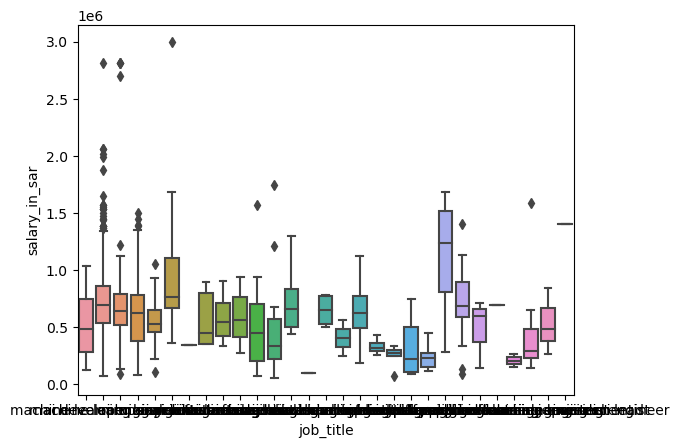

In [33]:
sns.boxplot(x='job_title', y='salary_in_sar', data=df)

#Rahaf Almalaq

#### visualization 2

In the scatter plot, we demonstrated the relationship between the remote ratio and the Saudi Riyal salary, described the level of experience by color. The majority of the high salaries are taken by the ( 0 remote ratio ) and the less salaries are taken by the ( 50 remote ratio ) with a higher level of experience in the ( 0 remote ratio ) and a lower level of experience in the ( 50 remote ratio ).

In [34]:
rng = np.random.default_rng()

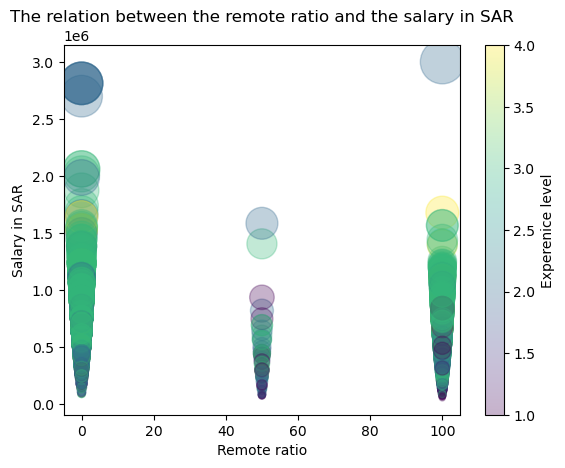

In [35]:
sizes = df['salary_in_sar']/df['salary_in_sar'].max() * 1000
colors = rng.random(len(df))  

plt.scatter(df.remote_ratio, df.salary_in_sar,
            c= df.experience_level, s=sizes, alpha=0.3, cmap='viridis')

plt.xlabel('Remote ratio')
plt.ylabel('Salary in SAR')
plt.title('The relation between the remote ratio and the salary in SAR')
plt.colorbar(label='Experenice level') 

plt.show()
#Abeer

#### visualization 3

The pie chart  shows the  relationship  between the remote ratio and the sum of  salaries  in SAR ,  and we found  that  the most  salaries   were   taken   by the ( 0 remote ratio ) and the  least   were   taken   by  the ( 50 remote ratio ) .

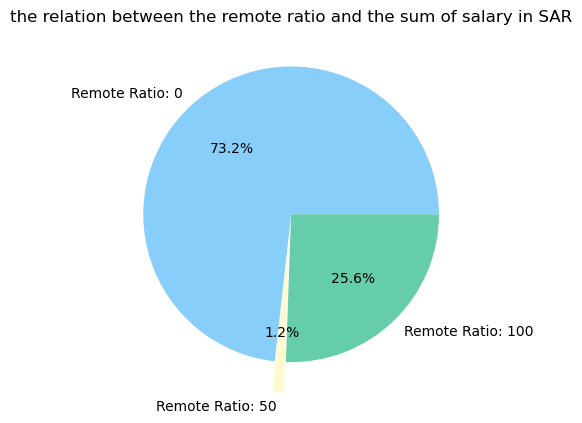

In [36]:
colors = [ 'lightskyblue', 'lemonchiffon', 'mediumaquamarine']
relation_remote_salary = df.groupby('remote_ratio')['salary_in_sar'].sum()
labels=['Remote Ratio: 0', 'Remote Ratio: 50', 'Remote Ratio: 100']
plt.pie(relation_remote_salary.values, labels=labels,autopct='%1.1f%%', colors=colors, explode = [0,0.2,0])
plt.title('the relation between the remote ratio and the sum of salary in SAR')
plt.show()
#Abeer

#### visualization 4

Heat map for the correlation between the avrage salary and company location, the colors represnt the the avrage salaries (the darkest the highest)

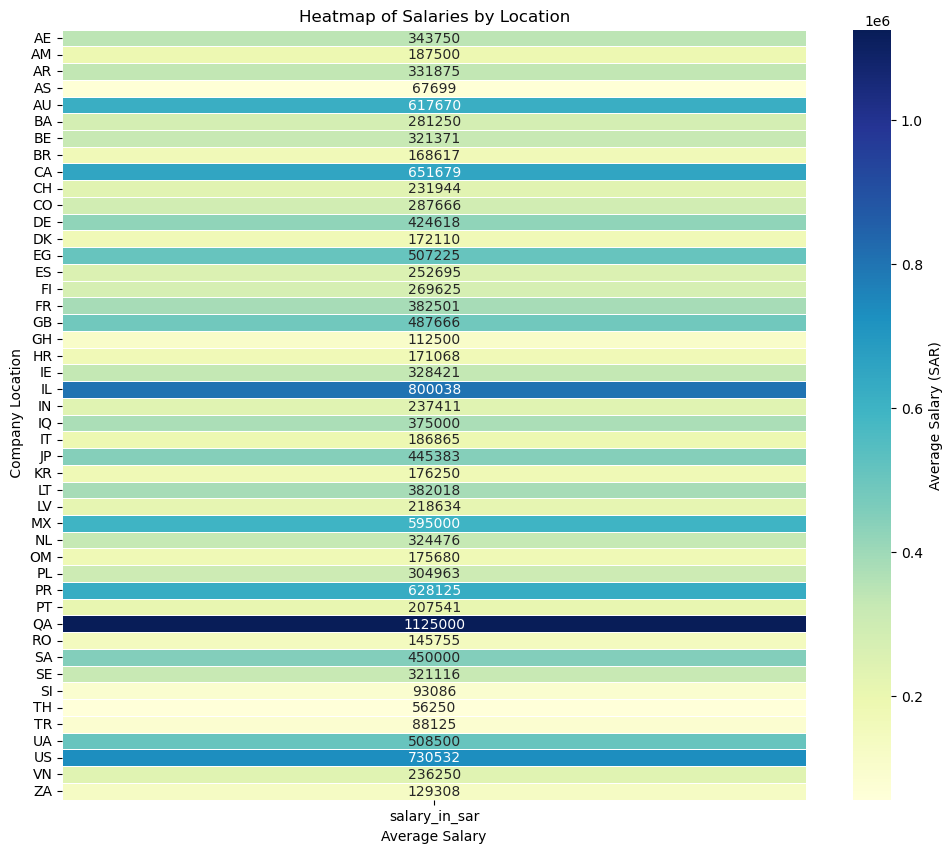

In [37]:
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table_salry_location, cmap='YlGnBu', linewidths=0.5, annot=True,fmt='.0f', cbar_kws={'label': 'Average Salary (SAR)'})
plt.title('Heatmap of Salaries by Location')
plt.xlabel('Average Salary')
plt.ylabel(' Company Location')
plt.show()
#layal

#### visualization 5

Heat map showing the relationship between average salaries, company location, and company size.


Text(52.722222222222214, 0.5, 'Company Location')

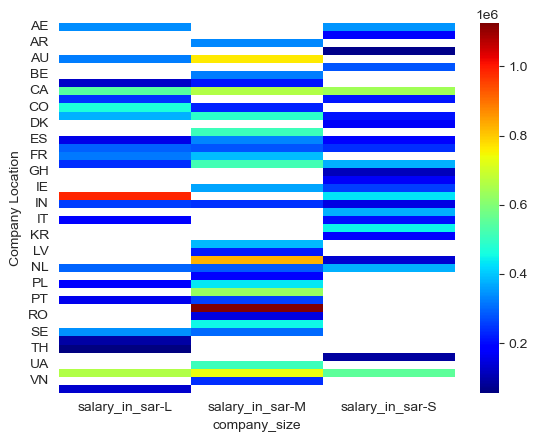

In [38]:
sns.set_style('white')
sns.heatmap(pivot_table_size_location_salary,cmap='jet')
plt.xlabel('company_size')
plt.ylabel('Company Location')
#Layal

#### visualization 6

The catplot shows the effect of the Company size over salaries and experience level

Text(0.5, 1.0, 'Relation of company size, salary, experience level')

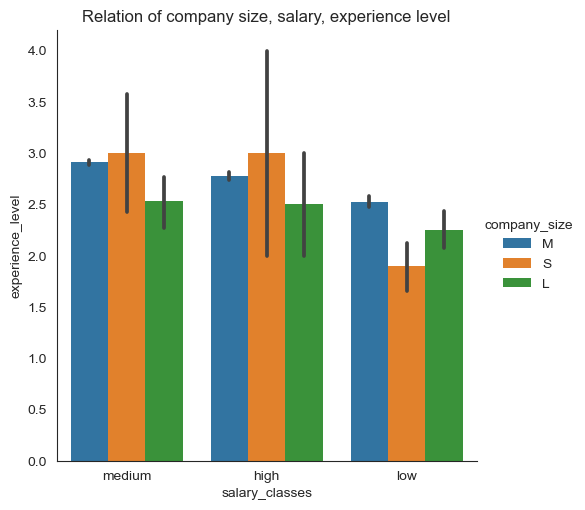

In [39]:
sns.catplot(
    data=df, 
    y='experience_level', 
    x='salary_classes', 
    kind='bar', 
    hue='company_size', 
    linewidth=0)
plt.title('Relation of company size, salary, experience level')
#Shumukh

refrencses for catplot https://youtu.be/P0KurfuevL8?si=8iEvBVW1lXxh13JR 

#### visualization 7

Lineplot that shows to us the relationship between salaries and experience level 

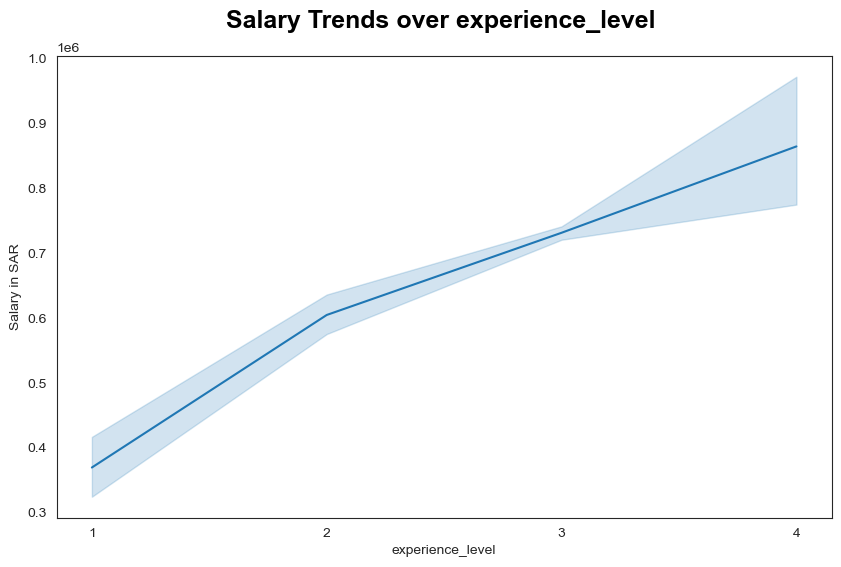

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['experience_level'], y=df['salary_in_sar'])

plt.xlabel('experience_level')
plt.ylabel('Salary in SAR')
plt.title('Salary Trends over experience_level ', pad=20, fontsize=18, color='black', fontweight='bold') 
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True)) #show integer values only 

#Shumukh and layal

#### visualaization 8

The word cloud Shows Most common word in job title 

In [41]:
# definitoin lemmatizer , stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def clean_text(job_title):
    #Check null or non-string value
    if not isinstance(job_title, str) or pd.isnull(job_title):
        return []  #Return empty list for invalid value
#-------------------------------------------------------------------------------
    job_title = re.sub(r'[^a-zA-Z\s]', '', job_title) #Remov non alphab char
    job_title = job_title.lower()  #  to lower case
    tokens = word_tokenize(job_title)  # Tokenize the text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatize, remove stopword

    #wejdan

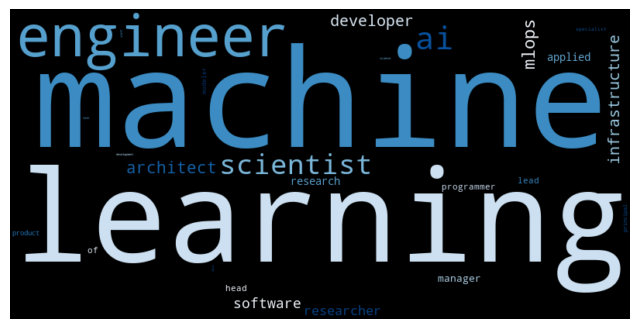

In [42]:
wordcloud = WordCloud(
width=800,
height=400,
background_color='black', colormap='Blues',contour_width=1,contour_color='white').generate_from_frequencies(word_counts)#Gener WordCloud from word frequencie
#creat the WordCloud
plt.figure(figsize=(8, 5)) #size of the figure
plt.imshow(wordcloud, interpolation='bilinear') #Render the WordCloud us bilinear
plt.axis('off') # axis hide
plt.show() # show the visu
#wejdan

refrenses for word cloud https://youtu.be/K8DUTNA-s7Q?si=ujUqZGj6OAjLo_ET 

### The Greatest Visualization 

honstly we loved to create a graphical heat map and we tried our best creating it from scrach but unfortunately we could not :( , so we seeked help from Chat GPT and of corce we needed to adjest multipule things to mach out data 

In [43]:
df['company_location'].unique()

array(['US', 'CA', 'ES', 'SE', 'PL', 'IN', 'NL', 'IL', 'GB', 'LT', 'SA',
       'AE', 'AU', 'EG', 'FI', 'TR', 'OM', 'BA', 'BR', 'AR', 'FR', 'DE',
       'IT', 'IE', 'VN', 'PT', 'CO', 'UA', 'RO', 'KR', 'CH', 'QA', 'ZA',
       'GH', 'MX', 'AM', 'LV', 'PR', 'TH', 'JP', 'IQ', 'BE', 'SI', 'DK',
       'AS', 'HR'], dtype=object)

In [44]:
#pip install folium 

#if the library is not installed already 

In [65]:
import folium
from folium.plugins import HeatMap
import pandas as pd

data = [
    ["US", 37.0902, -95.7129],  # United States
    ["CA", 56.1304, -106.3468], # Canada
    ["ES", 40.4637, -3.7492],   # Spain
    ["SE", 60.1282, 18.6435],   # Sweden
    ["PL", 51.9194, 19.1451],   # Poland
    ["IN", 20.5937, 78.9629],   # India
    ["NL", 52.1326, 5.2913],    # Netherlands
    ["IL", 31.0461, 34.8516],   # Israel
    ["GB", 55.3781, -3.4360],   # United Kingdom
    ["LT", 55.1694, 23.8813],   # Lithuania
    ["SA", 23.8859, 45.0792],   # Saudi Arabia
    ["AE", 23.4241, 53.8478],   # United Arab Emirates
    ["AU", -25.2744, 133.7751], # Australia
    ["EG", 26.8206, 30.8025],   # Egypt
    ["FI", 61.9241, 25.7482],   # Finland
    ["TR", 38.9637, 35.2433],   # Turkey
    ["OM", 21.4735, 55.9754],   # Oman
    ["BA", 43.9159, 17.6791],   # Bosnia and Herzegovina
    ["BR", -14.2350, -51.9253], # Brazil
    ["AR", -38.4161, -63.6167], # Argentina
    ["FR", 46.6034, 1.8883],    # France
    ["DE", 51.1657, 10.4515],   # Germany
    ["IT", 41.8719, 12.5674],   # Italy
    ["IE", 53.4129, -8.2439],   # Ireland
    ["VN", 14.0583, 108.2772],  # Vietnam
    ["PT", 39.3999, -8.2245],   # Portugal
    ["CO", 4.5709, -74.2973],   # Colombia
    ["UA", 48.3794, 31.1656],   # Ukraine
    ["RO", 45.9432, 24.9668],   # Romania
    ["KR", 35.9078, 127.7669],  # South Korea
    ["CH", 46.8182, 8.2275],    # Switzerland
    ["QA", 25.3548, 51.1839],   # Qatar
    ["ZA", -30.5595, 22.9375],  # South Africa
    ["GH", 7.9465, -1.0232],    # Ghana
    ["MX", 23.6345, -102.5528], # Mexico
    ["AM", 40.0691, 45.0382],   # Armenia
    ["LV", 56.8796, 24.6032],   # Latvia
    ["PR", 18.2208, -66.5901],  # Puerto Rico
    ["TH", 15.8700, 100.9925],  # Thailand
    ["JP", 36.2048, 138.2529],  # Japan
    ["IQ", 33.2232, 43.6793],   # Iraq
    ["BE", 50.8503, 4.3517],    # Belgium
    ["SI", 46.1512, 14.9955],   # Slovenia
    ["DK", 56.2639, 9.5018],    # Denmark
    ["AS", -14.2710, -170.1322],# American Samoa
    ["HR", 45.1000, 15.2000]    # Croatia
]

heat = pd.DataFrame(data, columns=["Country", "Latitude", "Longitude"])
heat['mean'] = df['salary_in_sar'].mean()

map_center = [20, 0]  # Approximate center of the world map
m = folium.Map(location=map_center, zoom_start=2)

# Prepare heatmap data (latitude, longitude, salary)
heat_data = [[row['Latitude'], row['Longitude'], row['mean']] for index, row in heat.iterrows()]

# Add heatmap layer
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(m)

m.save("salary_heatmap.html")

m

#Rahaf Almalaq, Layal, Shumukh

##### ___________________________________________________________________________________________________________

# Conclusion

## --------------------------------------------------------

#### After processing the data, we found out that:
1. The experience level is not the main factor affecting salary.
2. The highest-paying company is in CA, and it is a medium-sized company.
3. The highest payment is for the Lead AI Engineer job title.
4. The lowest payment is in Thailand for a large-sized company.
5. Usually, medium companies tend to hire people with the highest experience levels.
6. The highest average payment is in Qatar.
7. In the 0 remote ratio, experience and salaries are higher, and in the 50 remote ratio, they are lower.
8. The most common job title is Machine Learning Engineer.
9. There is a big difference in average salaries in different places. This means that where a company is located is very important for how much employees get paid.
10. We see that there are many different and wide-ranging job titles in the fields of AI and machine learning, indicating a variety of roles in this domain.